# Introducción a la inferencia estadística
# IE07 Caso práctico del TLC con Montecarlo - SOLUCION

## <font color='blue'>**Ejemplo del uso de TLC con simulación Montecarlo**</font>

Imagina que que disponemos de la historia de producción diaria de una organización. Veamos algunos ejemplos:
* Datos históricos de fabricación de piezas de repuestos para camiones mineros (producción física en unidades/semana).
* Datos de la cantidad de ventas de entradas para eventos (servicio online en entradas_vendidas/hora).
* Tenemos la velocidad de trabajo de un equipo ágil; la misma la medimos en Historias de usuario / sprint.

__Nota:__
Para la simulación de Montecarlo, se recomienda disponer de al menos 10 datos de historia. No podemos desarrollarla adecuadamente con, por ejmplo, 2 datos!!

Lectura adicional de [Montecarlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo)

Partamos cargando las librerías necesarias.


In [1]:
#Importamos librerias
import random
import numpy as np # importando numpy
import math
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a tomar el ejemplo de la fábrica de piezas de repuestos para camiones mineros. Asumiremos que disponemos de datos de 10 semanas de producción. La unidad de medida de los mismos es ``piezas/semana``. Las piezas se fabrican en un taller y no son todas iguales; por eso se fabrican pocas por semana.


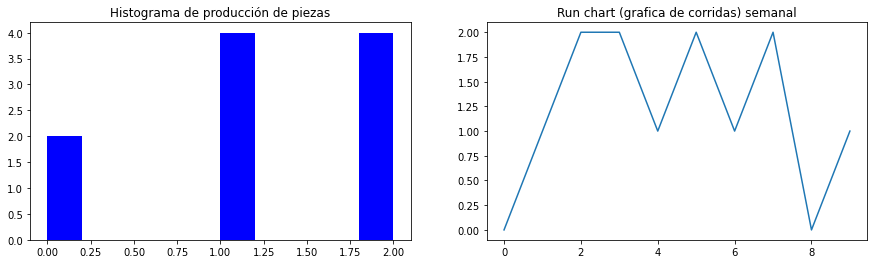


Tamaño muestra:  10
Media:  1.2
Desviación estándar:  2.37


In [ ]:
# Ingresar velocidad de produccion por por ciclo (semana)
# En este ejemplo tenemos historia de 10 semanas
# Si te fijas, las piezas son grandes; no se fabrican muchas por semana
velocidad = [0, 1, 2 ,2 ,1 ,2 ,1, 2, 0, 1]

# Graficamos histograma de la velocidad semanal
fig, ax = plt.subplots(1,2, figsize=(15,4))
nn, bins, patches = ax[0].hist(velocidad, bins=10, density=False, cumulative=False, color='b')
ax[0].set_title('Histograma de producción de piezas')
ax[1].plot(velocidad)
ax[1].set_title('Run chart (grafica de corridas) semanal')
plt.show()

# calcular estadísticos
n= np.size(velocidad)
media = np.mean(velocidad)
sigma = np.std(velocidad, ddof=n-1)

print('\nTamaño muestra: ', n)
print('Media: ', media)
print(f'Desviación estándar: {sigma: 4.2f}')

__Reflexión:__<br>
¿Qué tipo de distribución ves a priori en los datos? 
Los datos no son simétricos y no siguen una distribución clara. Esto se debe a los pocos datos y, si entendemos el trasfondo del negocio representado, podemos decir que la naturaleza del mismo quenera este tipo de datos "raros". Con certeza podemos decir que la variable es discreta dado que el registro de de productos terminados.

Adicional a lo anterior, es recomendable aplicar una análisis visual de la evolución de los datos en el tiempo. No queremos hacer una análisis con datos que no sean representativos de la realidad del negocio. Por ejemplo, si hubo dos semanas sin producción por fallas en el taller, o un paro de operadores, esas semanas no deberían ser parte del análisis. El saltarse esos datos debe ser una decisión cuidadosa ya que podría ser que lo que buscas es modelar precisamente ese fenómeno.


### Simulación Montecarlo
La organización está enfrentada a un proceso de licitación, el cual le demandará una cantidad $X$ de productos en las próximas semanas. Dado esto, necesita hacer, de forma urgente, un pronóstico de la cantidad de piezas que se pueden producir en, por ejemplo, 5 semanas más. Tenemos 10 semanas de historia y tenemos varias alternativas para responder la pregunta:

* Podríamos optar por el cámino facil, __determinístico y lineal__ de usar la media de los 10 datos y multiplicarla por 5.
* Podríamos desarrollar un plan de producción clásico basado en la cantidad de personas, cantidad de máquinas, etc., el cual sería una versión, incluso, más determinística que la anterior (y generalmente muy optimista).
* Podríamos desarrollar un complejo modelo de simulación estocástica, el cual probablemente nos tomaría una cantidad de tiempo y dinero que puede resultar costoso y sacaría a la organización del espacio de oportunidad.
* Por último, tenemos el camino de desarrollar una __proyección probabilistica__ basada en __Montecarlo__, la cual nos entregará una completa gama de opciones para tomar una mejor decisión, de forma sencilla, empírica y basada en nuestra propia historía.

__Comenta__:<br>
* ¿Cónoces otro método?

__Nota:__
El resultado del Montecarlo tiene un supuesto: se mantendrán en el futuro las caractarísticas del proceso simulado en el futuro. En nuestro caso, las máquinas, los operadores, los turnos, etc. serán los mismos.

### Paso 1
Definimos nuestros parámetros de simulación

In [ ]:
# Se necesita proyectar la cantidad de piezas que se pueden producir en 5 semanas más
# Para tal efecto se deben simular 5 semanas y luego sumar la cantidad de dichas 5 semanas
# Lo anterior se realizará 10.000 veces, es decir, se simularán 10.000 periodos de 5 semanas cada uno

s = 5 # es la cantidad de semanas a simular
m = 1 # es la cantidad de simulaciones a realizar de s semanas

### Paso 2
Para cada simulación de 5 semanas de producción, lanzaremos una ruleta que en nuestro caso tiene 10 casilleros; uno por cada semana de historia en nuestro ejemplo. Dependiendo del valor obtenido de la ruleta `[0:10]` iremos a buscar a nustra historia el valor de producción correspondiente. Por ejemplo; si la ruleta nos da un 3, iremos a buscar el valor historico que está en la posicion 3; esto es, 2 piezas.

Los datos que se obtienen de cada simulación los sumamos (esto sería la producción de las 5 semanas) y lo guardaremos en una lista `total`.

In [ ]:
n

10

In [ ]:
# Crear lista para almacenar sumas de los periodos (s semanas)
total=[] # Crearemos una lista para almacenar la suma de las simulaciones de s semanas
for k in range(0, m):
    suma=0
    for i in range(0, s):
      # Lanzamos la ruleta
      r = random.randint(0, n - 1)
      suma += velocidad[r]
    total.append(suma)
    
print(f'La producción para una corrida de simulación es: {total[0]} piezas')

La producción para una corrida de simulación es: 3 piezas


Antes de seguircon el paso 3, ejecuta la celda anterior varias veces. Verás que los resultados cambian en cada ejecución producto de lo probabilístico del proceso de la ruleta y de la seleción de los datos desde nuestras semanas históricas.

### Paso 3
Ahora ejecutaremos la misma celda, 10.000 veces para reducir los errores que podría generar el tomar una decisión de negocio con una única simulación.

In [ ]:
# Cambiamos nuesto m
m = 10000

# Crear lista para almacenar sumas de los periodos (s semanas)
total=[] #Crearemos una lista para almacenar la suma de las simulaciones de s semanas
for k in range(0, m):
    suma=0
    for i in range(0, s):
      # Lanzamos la ruleta
      r = random.randint(0, n - 1)
      suma += velocidad[r]
    total.append(suma)
    
print(f'La producción para 10000 corrida de simulación es')
print(f'Simulación #1 (periodo de 5 semanas): \t{total[0]}')
print(f'Simulación #2 (periodo de 5 semanas): \t{total[1]}')
print(f'Simulación #3 (periodo de 5 semanas): \t{total[2]}')
print('...')
print(f'Simulación #10000 (periodo de 5 semanas): \t{total[-1]}\n')

print(f'Media de totales: {np.mean(total): 4.2f}')
print(f'Desviación estándar: {np.std(total): 4.2f}')

La producción para 10000 corrida de simulación es
Simulación #1 (periodo de 5 semanas): 	4
Simulación #2 (periodo de 5 semanas): 	7
Simulación #3 (periodo de 5 semanas): 	7
...
Simulación #10000 (periodo de 5 semanas): 	9

Media de totales:  6.00
Desviación estándar:  1.66


### Paso 4
Graficamos la diustribución de probabilidadesde las 10.000 simulaciones.

Vemos que el valor más probable es 6, pero también podría ser 5 o 7.

No handles with labels found to put in legend.


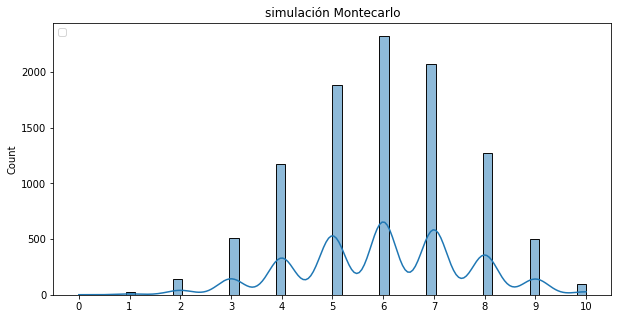

In [ ]:
#crear grafico, con las sumas de las 10.000 simulaciones
plt.figure(figsize=(10, 5))
plt.title('simulación Montecarlo')
# plt.hist(total,20,color='b',label='Total',density=True) #con 20  clases fijas
sns.histplot(data=total, kde=True)
plt.legend(loc='upper left')
plt.xticks(range(0,11))
plt.show()

El __TLC__ nos decía que, independientemente de la distribución de los datos originales (en nuestro caso la producción semana), la distribución de las __medias de sus muestras__ tiende a una distribución normal. En este ejemplo, podemos concluir que la __suma de las muestras__ también tiende a tener la misma distribución. Vemos acá una aplicación práctica del __TLC__.

### Paso 5
__Análisis__:

Alguien podría decir que para responder la pregunta solo bastaba con multiplicar la media ($\bar{x} = 1.2$ por la cantidad de semanas ($s=5$), lo cual nos daría una producción esperada de 6 unidades. Sin embargo, veamos la probabilidad que ocurra exactamente ese caso (6 unidades en las próximas 5 semanas).

In [ ]:
#Calcular la prob de entregar exactamente 6 unidades en 5 semanas (1,2*5)
prob6 = total.count(6) / m
print(f'Número de simulaciones = \t\t{m}')
print(f'Probabilidad de entregar 6 unidades = \t{prob6:4.2f}')

Número de simulaciones = 		10000
Probabilidad de entregar 6 unidades = 	0.23


Como vemos, la probabilidad de obtener 6 unidades es __solo de un 22%__; la estrategia determinística es de alto riesgo (en este caso es  (1 - 0.22) = 78%).

Para evitar este riesgo, la proyección probabiliçistica con Montecarlo no invita a determinar una probabilidad de acierto para nuestro pronóstico en la cantidad de piezas a producir. **De forma empírica, cuando usamos Montecarlo, buscaremos que la probabilidad de nuestro resultado tenga al menos un 85% de probabilidad de éxito**.  Por lo tanto, calcularemos el perceltil 15 el cual representará el valor mínimo de producción para obtener un 85% de seguridad de ocurrencia.


In [ ]:
# Es mejor calcular un valor que nos entregue un 85% de seguridad de cumplirse
# Aquí el valor de montecarlo que nos permite ver toda la distrucion de posibles resultados

p15= np.percentile(total, 15)
print('Percentil 15: ',p15)

#Por ques es mejor pensar probabilisticamente que deterministicamente?

Percentil 15:  4.0


Con un 85% de deguridad vamos a producir __al menos__ 4 piezas en las próximas 5 semanas. Puede que sean 5, 6 7 o más, pero al menos serán 4.

Si la pedida del cliente es producir 8 piezas, vemos esa probabilidad.

In [ ]:
prob8 = total.count(8) / m
print(f'Probabilidad de entregar 8 unidades = {prob8:4.2f}')

Probabilidad de entregar 8 unidades = 0.13


In [ ]:
prob8 = total.count(8) / m
prob9 = total.count(9) / m
prob10 = total.count(10) / m

print(f'Probabilidad de entregar >8 unidades = {prob8+prob9+prob10:4.2f}')

Probabilidad de entregar >8 unidades = 0.19


Por lo tanto, si este fuerra el caso, la decisión sería no postular al contrato o, en su defecto, ver formas de aumentar la capacidadd de producción.

## <font color='green'>**Actividad 1**</font>

Con alguno de los casos de ejemplo que dimos:
* Datos de la cantidad de ventas de entradas para eventos (servicio online en entradas_vendidas/hora).
* Tenemos la velocidad de trabajo de un equipo ágil; la misma la medimos en Historias de usuario / sprint.
<br>o con<br> 
* Un caso de uso propio de algno de los alumnos del grupo.

1. Desarrolle una pregunta de negocio a responder.
2. Desarrolle una simulación de Montecarlo.
2. Consididere que tiene una historia de 15 unidades de tiempo (horas o sprints de 3 semanas)


In [2]:
# utilicemos los rendimientos de los últimos dos años de la AFP 

import requests
import json
import pandas as pd

api_url = 'https://www.quetalmiafp.cl/api/Cuota/ObtenerCuotas'

parameters = {
        "listaAFPs"  : 'CAPITAL',
        "listaFondos": 'A',
        "fechaInicial" : "01/02/2019" ,
        "fechaFinal" :  "01/02/2022"  }

response = requests.get(api_url, params=parameters)

js = response.json()
df = pd.json_normalize(js)

#convert fecha to index
df.set_index('fecha', inplace=True)
df.sample(5)


,afp,fondo,valor,valorUf
fecha,,,,
2020-01-02,CAPITAL,A,49130.11,28311.77
2021-05-10,CAPITAL,A,53673.96,29533.28
2019-04-17,CAPITAL,A,43566.86,27602.45
2021-01-25,CAPITAL,A,54389.60,29106.86
2019-12-20,CAPITAL,A,49110.09,28299.91


Valor de rentabilidad

Referencia: https://www.spensiones.cl/portal/compendio/596/w3-propertyvalue-4305.html#:~:text=La%20rentabilidad%20real%20de%20la,mismo%20per%C3%ADodo%2C%20expresado%20en%20t%C3%A9rminos

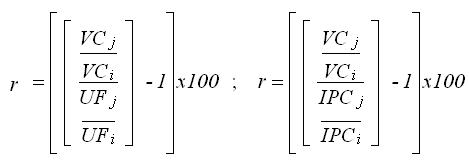


Donde:

* r = rentabilidad real de la cuota en el período de cálculo.

* i = mes anterior al primero del período de cálculo.

* j = último mes del período de cálculo.

* VC_i = valor cuota del primer día del mes i.

* VC_j = valor cuota del primer día del mes j.

* UF_i = valor de la Unidad de Fomento en el primer día del mes i.

* UF_j = valor de la Unidad de Fomento en el primer día del mes j.



In [3]:
#extraer el valor cuota del dia 1 de cada mes
dates = pd.date_range('2019-02-01','2022-02-01' , freq='1M')-pd.offsets.MonthBegin(1)
dates = dates.strftime("%Y-%m-%d")

valor_cuota_mes = df[df.index.isin(dates)]
valor_cuota_mes.head()

#crear vector con rentabilidades reales (corregidas por valor UF)
# https://www.spensiones.cl/portal/compendio/596/w3-propertyvalue-4305.html#:~:text=La%20rentabilidad%20real%20de%20la,mismo%20per%C3%ADodo%2C%20expresado%20en%20t%C3%A9rminos
VC = valor_cuota_mes['valor']
UF = valor_cuota_mes['valorUf']

rent = ((VC[1:].values/VC[0:-1].values)/(UF[1:].values/UF[0:-1].values) - 1)*100

#imprimir las rentabilidades en porcentajes
rent

array([ 2.30747602e-01,  3.06690568e+00,  1.31829610e+00, -1.37682457e+00,
        1.15284948e+00,  1.82401388e+00, -2.24740359e+00,  4.04171031e+00,
        1.33727003e+00,  8.25530513e+00, -4.17560090e+00,  4.11399436e+00,
       -4.42042483e+00, -1.57223320e+01,  7.36474534e+00, -1.25719932e+00,
        6.73103551e+00, -8.38298063e-01,  4.44294940e+00, -1.39673606e+00,
       -1.93141654e+00,  8.27618609e+00, -9.79791628e-01,  3.94364331e+00,
       -6.60875468e-01,  8.25511323e-01,  3.83378466e-01,  1.77025121e+00,
        4.64665711e-01,  1.21932036e+00,  2.37076984e+00,  1.01470420e-02,
       -1.99309612e-01,  2.18455051e-01,  2.09997903e+00])

In [37]:
# tenemos una estadisticas de rentabilidades del fondo A desde   "fechaInicial" : "01/02/2020" hasta  "fechaFinal" :  "01/02/2022" 
print(f'Desde 01/02/2019 hasta 01/02/2022, se tiene la siguientes estadisticas de tendencia central para las rentabilidades:')
print(f'\t En el periodo tenemos {len(rent)} mediciones de rentabilidad')
print(f'\t La media de rentabilidad en el periodo es {rent.mean(): 2.4} %' )
print(f'\t La desviación estándar de rentabilidad en el periodo es {rent.std(): 2.4} %')

Desde 01/02/2019 hasta 01/02/2022, se tiene la siguientes estadisticas de tendencia central para las rentabilidades:
	 En el periodo tenemos 35 mediciones de rentabilidad
	 La media de rentabilidad en el periodo es  0.8645 %
	 La desviación estándar de rentabilidad en el periodo es  4.183 %


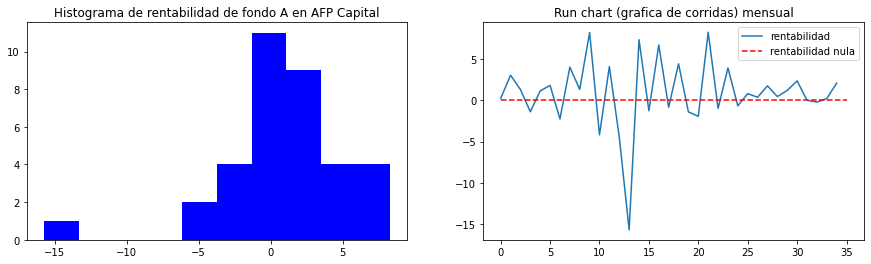


Tamaño muestra:  35
Media:  0.8644547896357112
Desviación estándar:  24.75


In [40]:
# Graficamos histograma de la rentabilidad mensual

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(rent, bins=10, density=False, cumulative=False, color='b')
ax[0].set_title('Histograma de rentabilidad de fondo A en AFP Capital')
ax[1].plot(rent, label='rentabilidad')
ax[1].plot([0, 35], [0, 0], 'r--', label='rentabilidad nula')
ax[1].set_title('Run chart (grafica de corridas) mensual')
ax[1].legend()
plt.show()

# calcular estadísticos
n= np.size(rent)
media = np.mean(rent)
sigma = np.std(rent, ddof=n-1)

print('\nTamaño muestra: ', n)
print('Media: ', media)
print(f'Desviación estándar: {sigma: 4.2f}')

Obs: Notar que hay una rentabilidad muy negativa (~15%) por efecto de la pandemia del COVID-19

In [6]:
# Modelaremos las rentabilidades acumuladas de los próximos tres meses en el fondo A de la AFP Capital

m = 10000
s = 3 #3 meses

# Crear lista para almacenar sumas de los periodos (s meses)
total=[] #Crearemos una lista para almacenar la suma de las simulaciones de s meses
for k in range(0, m):
    suma=0
    for i in range(0, s):
      # Lanzamos la ruleta
      r = random.randint(0, n - 1)
      suma += rent[r]
    total.append(suma)
    
print(f'La producción para 10000 corrida de simulación es')
print(f'Simulación #1 (3 meses): \t{total[0]}')
print(f'Simulación #2 (3 meses): \t{total[1]}')
print(f'Simulación #3 (3 meses): \t{total[2]}')
print('...')
print(f'Simulación #10000 (3 meses): \t{total[-1]}\n')

print(f'Media de totales: {np.mean(total): 4.2f}')
print(f'Desviación estándar: {np.std(total): 4.2f}')

La producción para 10000 corrida de simulación es
Simulación #1 (3 meses): 	10.176855506161086
Simulación #2 (3 meses): 	-3.6009227411018196
Simulación #3 (3 meses): 	5.7176779128015776
...
Simulación #10000 (3 meses): 	0.6578083487055575

Media de totales:  2.62
Desviación estándar:  7.21


No handles with labels found to put in legend.


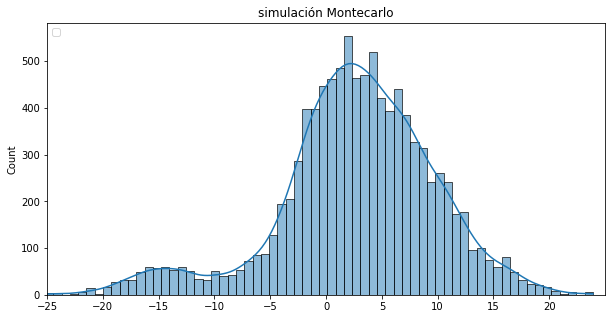

In [7]:
#crear grafico, con las sumas de las 10.000 simulaciones
plt.figure(figsize=(10, 5))
plt.title('simulación Montecarlo')
# plt.hist(total,20,color='b',label='Total',density=True) #con 20  clases fijas
sns.histplot(data=total, kde=True)
plt.legend(loc='upper left')
plt.xticks(range(-25, 25, 5))
plt.xlim([-25,25])
plt.show()

Basandose en el supuesto que las rentabilidades pasadas se repetirán en el futuro (_el cual es cuestionable_), el trabajador necesita saber si invierte o no un APV en el fondo A o destina ese monto para otros fines. Para tales fines debe responder las siguientes preguntas;

i. ¿Cuál es la rentabilidad real acumulada más probable en los próximos 3 meses?

ii. ¿Cuál es la rentabilidad real acumulada que tendrá al menos un 85% de probabilidad de éxito?

iii. ¿Cuál es la probabilidad de obtener a lo menos un 2% de rentabilidad acumulada real en próximos 3 meses?

iv. ¿Cuál es la probabilidad de que el dinero invertido no pierda poder adquisitivo en los próximos 3 meses?


In [23]:
# i. ¿Cuál es la rentabilidad real acumulada más probable en los próximos 3 meses?
# El valor más probable corresponde al percentil-50 (o mediana) de la distribución

p50 = np.percentile(total, 50)
print(f'La rentabilidad real acumulada más probable en los próximos 3 meses es de {p50: 2.3f} %')

La rentabilidad real acumulada más probable en los próximos 3 meses es de  2.973 %


In [36]:
# ii. ¿Cuál es la rentabilidad real acumulada que tendrá al menos un 85% de probabilidad de éxito?
# La rentabilidad de al menos un 85% de éxito corresponde al percentil-15

p15 = np.percentile(total, 15)
print(f'La rentabilidad real acumulada con 85% de éxito en los próximos 3 meses es de {p15: 2.3f} %')

La rentabilidad real acumulada con 85% de éxito en los próximos 3 meses es de -3.112 %


In [32]:
# iii. ¿Cuál es la probabilidad de obtener a lo menos un 2% de rentabilidad acumulada real en próximos 3 meses?

simulated_higher2 = np.array(total) >= 2
prob_mas2 = sum(simulated_higher2)/m

print(f'La probabilidad de que el fondo A tenga una rentabilidad real acumulada mayor que 2% en los próximos 3 meses es de {prob_mas2*100: 2.3f} %')

La probabilidad de que el fondo A tenga una rentabilidad real acumulada mayor que 2% en los próximos 3 meses es de  56.470 %


In [33]:
# iv. ¿Cuál es la probabilidad de que el dinero invertido no pierda poder adquisitivo en los próximos 3 meses?
#para que no haya perdida de poder adquisito las rentabilidades reales deben ser mayores que 0

simulated_higher0 = np.array(total) >= 0
prob_mas0 = sum(simulated_higher0)/m

print(f'La probabilidad de que el dinero del inversor no pierda poder adquisitivo en los próximos 3 meses es de {prob_mas0*100: 2.3f} %')

La probabilidad de que el dinero del inversor no pierda poder adquisitivo en los próximos 3 meses es de  69.680 %


<font color='green'>Fin actividad 1</font>